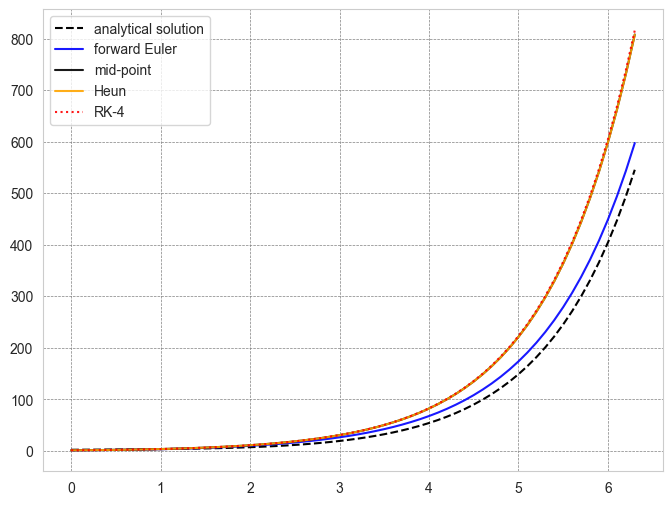

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    return y + np.sin(t)

def forward_euler(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        y += h * f(t, y)
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

def mid_point(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        y += h * k2
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

def heun(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + h, y + h * k1)
        y += h/2 * (k1 + k2)
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

def rk4(f, t0, y0, h, N):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + h/2, y + h/2 * k1)
        k3 = f(t + h/2, y + h/2 * k2)
        k4 = f(t + h, y + h * k3)
        y += h/6 * (k1 + 2*k2 + 2*k3 + k4)
        t += h
        t_values.append(t)
        y_values.append(y)
    return np.array(t_values), np.array(y_values)

# define the time range and the time step
t0 = 0
y0 = 1
h = 0.1
t = np.arange(t0, 2*np.pi + h, h)  # Adjusted range to include the final value

# define the number of steps
N = len(t)-1

# define the analytical solution
def analytical_solution(t):
    return np.exp(t) + np.cos(t)

# create the plot
plt.figure(figsize=(8, 6))
plt.plot(t, analytical_solution(t), label='analytical solution', color='black', linestyle='--')

# forward Euler method
t_euler, y_euler = forward_euler(f, t0, y0, h, N)
plt.plot(t_euler, y_euler, label='forward Euler', color='blue', alpha=0.9)

# mid-point method
t_mid, y_mid = mid_point(f, t0, y0, h, N)
plt.plot(t_mid, y_mid, label='mid-point', color='black', alpha=0.9)

# Heun method
t_heun, y_heun = heun(f, t0, y0, h, N)
plt.plot(t_heun, y_heun, label='Heun', color='orange', alpha=0.9)

# RK-4 method
t_rk4, y_rk4 = rk4(f, t0, y0, h, N)
plt.plot(t_rk4, y_rk4, label='RK-4', color='red', alpha=0.9, linestyle=':')
# add the legend and the grid
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# show the plot
plt.show()

In [ ]:
# a. dP/dt =rP (1−P/K) ,P(0)=90. Take r=5, K=80. Find the solution for t∈[0,200].



In [ ]:
# b. my′′ +cy′ +ky = 0, y(0) = 0, y′(0) = 2. Take m = 10, k = 90, c = 10. Take appropriate time interval.



In [ ]:
# c. x ̈+ μ(x^2−1)x ̇+x=0.x(0)=0, x ̇(0)=2. Take μ=0,2,−2. Take appropriate time interval.



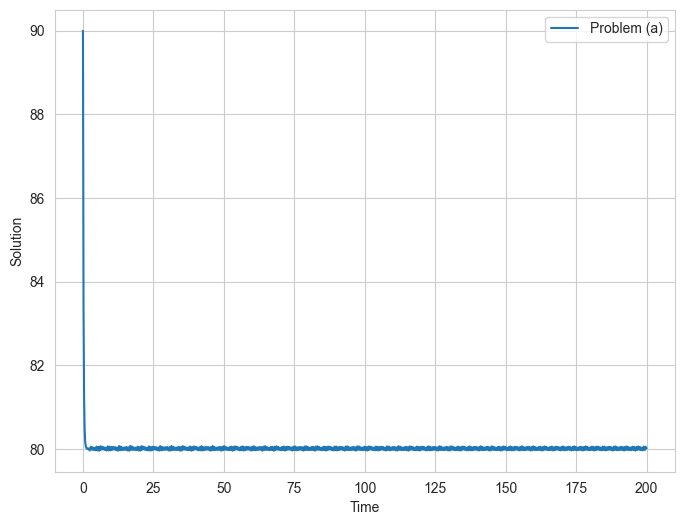

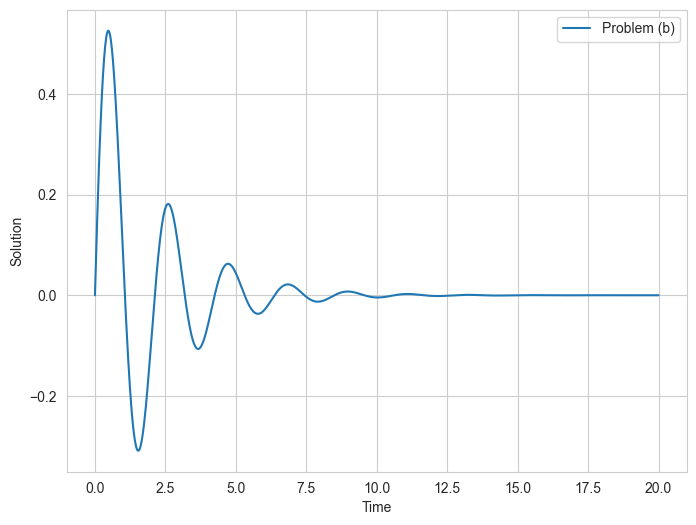

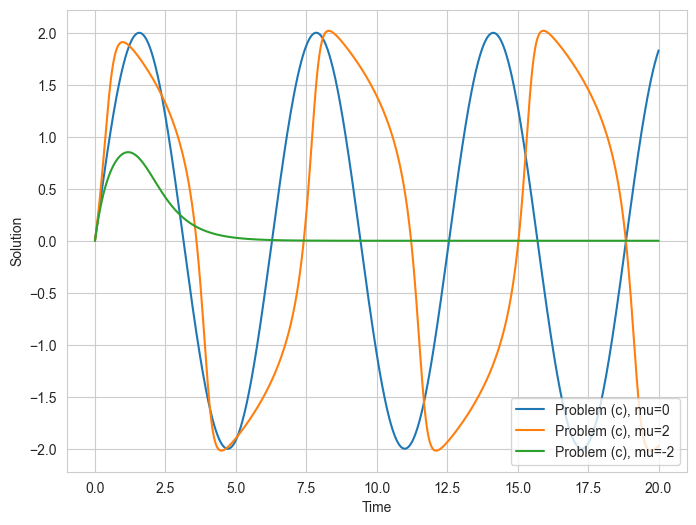

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Problem (a)
def fun_a(t, P):
    r = 5
    K = 80
    return r * P * (1 - P / K)

sol_a = solve_ivp(fun_a, [0, 200], [90], method='RK45', dense_output=True)

t = np.linspace(0, 200, 1000)
plt.figure(figsize=(8, 6))
plt.plot(t, sol_a.sol(t)[0], label='Problem (a)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

# Problem (b)
def fun_b(t, y):
    m = 10
    k = 90
    c = 10
    return [y[1], -k / m * y[0] - c / m * y[1]]

sol_b = solve_ivp(fun_b, [0, 20], [0, 2], method='RK45', dense_output=True)

t = np.linspace(0, 20, 1000)
plt.figure(figsize=(8, 6))
plt.plot(t, sol_b.sol(t)[0], label='Problem (b)')
plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()

# Problem (c)
def fun_c(t, x, mu):
    return [x[1], mu * (1 - x[0] ** 2) * x[1] - x[0]]

# Plotting
t = np.linspace(0, 20, 1000)
plt.figure(figsize=(8, 6))

for mu in [0, 2, -2]:
    sol_c = solve_ivp(fun_c, [0, 20], [0, 2], args=(mu,), method='RK45', dense_output=True)
    plt.plot(t, sol_c.sol(t)[0], label=f'Problem (c), mu={mu}')

plt.xlabel('Time')
plt.ylabel('Solution')
plt.legend()
plt.show()
